In [ ]:
!pip install yfinance
!pip install yahoofinancials

     |████████████████████████████████| 6.3 MB 7.4 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15190 sha256=cf0c133ca2dc489ed42b5bb25f7ee78931ea3aa152006347c2dfa66ae1269bfa
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from yahoofinancials import YahooFinancials

In [ ]:
start = '2010-01-01'
end = '2019-12-31'
df = yf.download('TCS.NS', 
                      start, 
                      end, 
                      progress=False,
)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,377.399994,379.450012,374.524994,375.825012,299.748260,1963682
2010-01-05,377.500000,379.774994,373.274994,375.924988,299.827972,2014488
2010-01-06,375.924988,376.100006,366.500000,367.424988,293.048584,3349176
2010-01-07,367.750000,369.700012,355.500000,357.200012,284.893402,6474892
2010-01-08,358.000000,359.250000,348.250000,349.899994,279.071136,6048178


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,2210.000000,2241.949951,2210.000000,2231.699951,2166.054443,2247329
2019-12-24,2239.000000,2243.550049,2211.149902,2215.600098,2150.428955,1805896
2019-12-26,2216.399902,2229.000000,2195.199951,2201.949951,2137.180176,1880367
2019-12-27,2208.000000,2226.399902,2176.000000,2198.500000,2133.831543,2720261
2019-12-30,2207.000000,2225.000000,2177.100098,2183.199951,2118.981445,2288830


In [ ]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,377.399994,379.450012,374.524994,375.825012,299.748260,1963682
1,2010-01-05,377.500000,379.774994,373.274994,375.924988,299.827972,2014488
2,2010-01-06,375.924988,376.100006,366.500000,367.424988,293.048584,3349176
3,2010-01-07,367.750000,369.700012,355.500000,357.200012,284.893402,6474892
4,2010-01-08,358.000000,359.250000,348.250000,349.899994,279.071136,6048178


In [ ]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,377.399994,379.450012,374.524994,375.825012,1963682
1,377.500000,379.774994,373.274994,375.924988,2014488
2,375.924988,376.100006,366.500000,367.424988,3349176
3,367.750000,369.700012,355.500000,357.200012,6474892
4,358.000000,359.250000,348.250000,349.899994,6048178


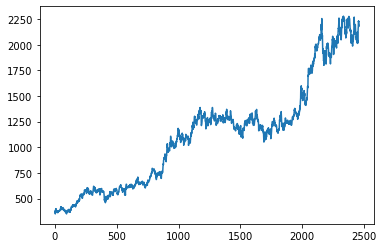

In [ ]:
plt.plot(df.Close)

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
2456    2136.080504
2457    2136.957506
2458    2137.886505
2459    2138.571505
2460    2138.612006
Name: Close, Length: 2461, dtype: float64

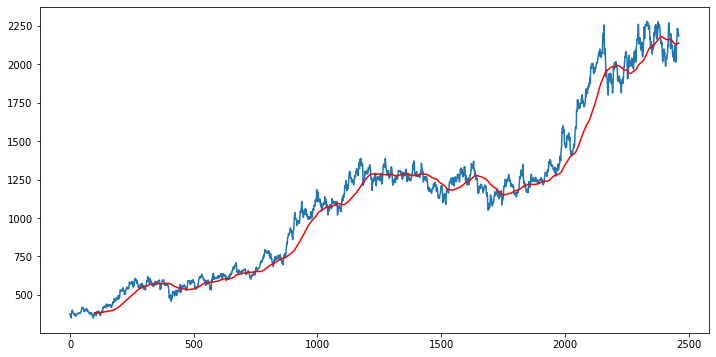

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
2456    2128.343507
2457    2129.495757
2458    2130.312007
2459    2131.014007
2460    2132.012757
Name: Close, Length: 2461, dtype: float64

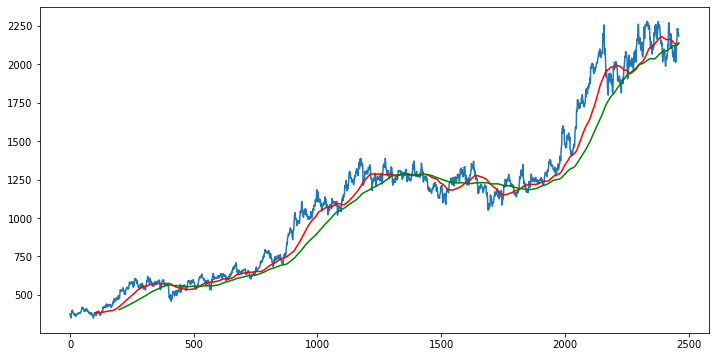

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(2461, 5)

In [ ]:
#Spliting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1722, 1)
(739, 1)


In [ ]:
data_training.head()

,Close
0,375.825012
1,375.924988
2,367.424988
3,357.200012
4,349.899994


In [ ]:
data_testing.head()

,Close
1722,1156.699951
1723,1175.849976
1724,1182.775024
1725,1180.675049
1726,1184.125000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02509092],
       [0.02518721],
       [0.01700016],
       ...,
       [0.76503171],
       [0.76743967],
       [0.78203179]])

In [ ]:
data_training_array.shape

(1722, 1)

In [ ]:
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train), np.array(y_train)

ML Model

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units=50, activation= 'relu', return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation= 'relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation= 'relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
51/51 [==============================] - 18s 269ms/step - loss: 0.0856
Epoch 2/50
51/51 [==============================] - 14s 269ms/step - loss: 0.0149
Epoch 3/50
51/51 [==============================] - 14s 270ms/step - loss: 0.0118
Epoch 4/50
51/51 [==============================] - 14s 271ms/step - loss: 0.0111
Epoch 5/50
51/51 [==============================] - 14s 271ms/step - loss: 0.0104
Epoch 6/50
51/51 [==============================] - 14s 271ms/step - loss: 0.0110
Epoch 7/50
51/51 [==============================] - 14s 271ms/step - loss: 0.0100
Epoch 8/50
51/51 [==============================] - 14s 270ms/step - loss: 0.0089
Epoch 9/50
51/51 [==============================] - 14s 270ms/step - loss: 0.0079
Epoch 10/50
51/51 [==============================] - 14s 265ms/step - loss: 0.0083
Epoch 11/50
51/51 [==============================] - 14s 267ms/step - loss: 0.0079
Epoch 12/50
51/51 [==============================] - 14s 266ms/step - loss: 0.0077
Epoch 13/50
5

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

,Close
1722,1156.699951
1723,1175.849976
1724,1182.775024
1725,1180.675049
1726,1184.125000


In [ ]:
data_training.tail(100)

,Close
1622,1354.125000
1623,1349.599976
1624,1328.150024
1625,1326.000000
1626,1324.550049
...,...
1717,1156.800049
1718,1153.849976
1719,1144.050049
1720,1146.550049


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing,ignore_index=True)

In [ ]:
final_df.head()

,Close
0,1354.125000
1,1349.599976
2,1328.150024
3,1326.000000
4,1324.550049


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.24731647],
       [0.24362972],
       [0.22615344],
       [0.22440171],
       [0.22322037],
       [0.22338328],
       [0.22366842],
       [0.23393421],
       [0.24798859],
       [0.25961913],
       [0.24057442],
       [0.21321933],
       [0.21892256],
       [0.2046441 ],
       [0.18232001],
       [0.20364605],
       [0.19183222],
       [0.18327738],
       [0.17264489],
       [0.16270502],
       [0.18046644],
       [0.16708428],
       [0.16553625],
       [0.16851009],
       [0.15598336],
       [0.13826261],
       [0.09000925],
       [0.10237297],
       [0.10506167],
       [0.09259601],
       [0.09198495],
       [0.10614117],
       [0.126408  ],
       [0.12439153],
       [0.12720236],
       [0.11278138],
       [0.12096963],
       [0.12219175],
       [0.13644982],
       [0.13113358],
       [0.13714233],
       [0.13429072],
       [0.12650985],
       [0.12384153],
       [0.11618299],
       [0.11716065],
       [0.10862619],
       [0.113

In [ ]:
input_data.shape

(839, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(739, 100, 1)
(739,)


In [ ]:
# Making Predictions
y_predicted = model.predict(x_test)

In [ ]:
y_predicted.shape

(739, 1)

In [ ]:
scaler.scale_

array([0.00081475])

In [ ]:
scale_factor = 1/0.00081475
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

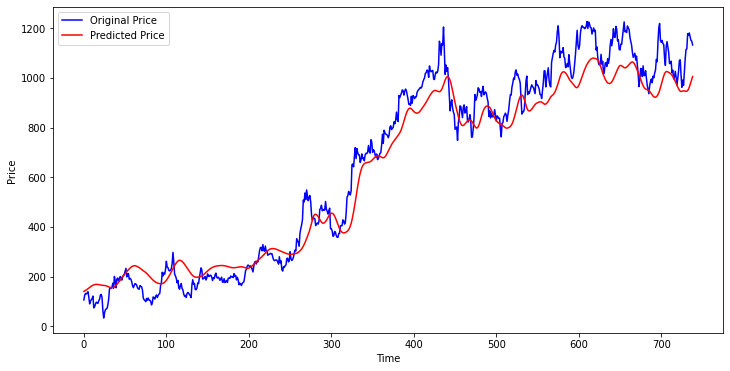

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()